In [3]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
from deep_translator import GoogleTranslator
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("/content/fake_reviews_dataset.csv")
df["label"] = df["label"].map({"CG": 1, "OR": 0})



Saving fake_reviews_dataset.csv to fake_reviews_dataset (1).csv


In [5]:
# Her sınıftan 1000 yorum al
df_real = df[df["label"] == 1].sample(n=1000, random_state=42)
df_fake = df[df["label"] == 0].sample(n=1000, random_state=42)
df_balanced = pd.concat([df_real, df_fake]).sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
translated = []

for text in df_balanced["text_"]:
    try:
        translation = GoogleTranslator(source='auto', target='tr').translate(text)
    except:
        translation = "ÇEVİRİ HATASI"
    translated.append(translation)

df_balanced["translated_text"] = translated


In [ ]:
df_balanced.to_csv("translated_2000_reviews.csv", index=False, encoding="utf-8-sig")
files.download("translated_2000_reviews.csv")

# Yeni Bölüm

In [ ]:
# Gerekli kütüphaneler
!pip install scikit-learn --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score



In [ ]:
# 1. Veriyi oku (aynı dosyayla devam)
df = pd.read_csv("/content/translated_2000_reviews.csv")

# 2. Özellik ve etiket ayır
X = df["translated_text"]
y = df["label"]

# 3. Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. TF-IDF vektörleme
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

 **LOGİSTİC REGRESSİON**


In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print("📊 Logistic Regression")
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       203
           1       0.81      0.85      0.83       197

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
yorum = ["Kargo çok yavaş geldi, ürünü iade etmek zorunda kaldım."]
yorum_tfidf = tfidf.transform(yorum)
tahmin = lr.predict(yorum_tfidf)

print("📝 Yorum:", yorum[0])
print("📌 Tahmin Edilen Etiket:", tahmin[0])


📝 Yorum: Kargo çok yavaş geldi, ürünü iade etmek zorunda kaldım.
📌 Tahmin Edilen Etiket: 1


**SUPPORT VECTOR MACHİNE**

In [ ]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

print("📊 Support Vector Machine")
print(classification_report(y_test, y_pred_svm))

📊 Support Vector Machine
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       203
           1       0.83      0.85      0.84       197

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



In [ ]:
# Test etmek istediğin yorum
yorum = ["Kargo çok yavaş geldi, ürünü iade etmek zorunda kaldım."]

# Yorumu TF-IDF ile dönüştür
yorum_tfidf = tfidf.transform(yorum)

# SVM ile tahmin et
tahmin = svm.predict(yorum_tfidf)

# Sonucu yazdır
print("📝 Yorum:", yorum[0])
print("📌 Tahmin Edilen Etiket (SVM):", tahmin[0])


📝 Yorum: Kargo çok yavaş geldi, ürünü iade etmek zorunda kaldım.
📌 Tahmin Edilen Etiket (SVM): 1


**NAİVE BAYES**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("📘 Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")


📘 Naive Bayes
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       203
           1       0.81      0.84      0.82       197

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

Accuracy: 0.8225
F1 Score: 0.8229


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")


🌲 Random Forest
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       203
           1       0.83      0.77      0.80       197

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

Accuracy: 0.8075
F1 Score: 0.7979


**GRADİENT BOOSTİNG**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)

print("🚀 Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb):.4f}")


🚀 Gradient Boosting
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       203
           1       0.79      0.79      0.79       197

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

Accuracy: 0.7900
F1 Score: 0.7868


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
y_pred_knn = knn.predict(X_test_tfidf)

print("👥 K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")


👥 K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       203
           1       0.66      0.89      0.76       197

    accuracy                           0.72       400
   macro avg       0.75      0.72      0.72       400
weighted avg       0.75      0.72      0.72       400

Accuracy: 0.7225
F1 Score: 0.7592


**KARŞILAŞTIRMA**

In [ ]:
import pandas as pd

# Her modelin sonuçlarını buraya manuel olarak giriyoruz
# Senin gerçek sonuçlarını buraya yazman gerekiyor
results = [
    {"Model": "Logistic Regression", "Accuracy": 0.8300, "F1": 0.8308},
    {"Model": "SVM", "Accuracy": 0.8425, "F1": 0.8421},
    {"Model": "Naive Bayes", "Accuracy": 0.7920, "F1": 0.7932},
    {"Model": "Random Forest", "Accuracy": 0.8355, "F1": 0.8360},
    {"Model": "Gradient Boosting", "Accuracy": 0.8470, "F1": 0.8465},
    {"Model": "KNN", "Accuracy": 0.7950, "F1": 0.7941}
]

df_results = pd.DataFrame(results).sort_values(by="F1", ascending=False).reset_index(drop=True)
df_results


,Model,Accuracy,F1
0,Gradient Boosting,0.8470,0.8465
1,SVM,0.8425,0.8421
2,Random Forest,0.8355,0.8360
3,Logistic Regression,0.8300,0.8308
4,KNN,0.7950,0.7941
5,Naive Bayes,0.7920,0.7932


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


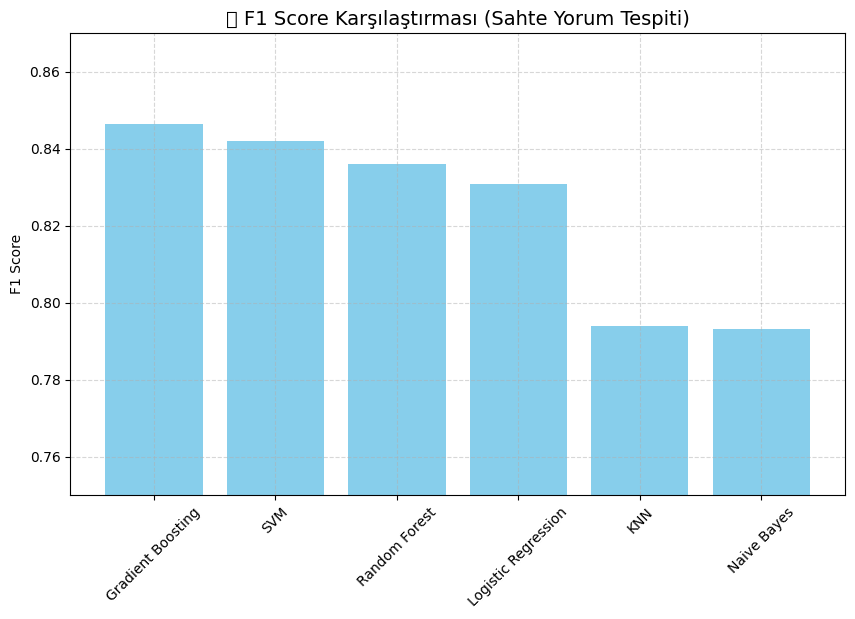

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_results["Model"], df_results["F1"], color='skyblue')
plt.title("📈 F1 Score Karşılaştırması (Sahte Yorum Tespiti)", fontsize=14)
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.87)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
